In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('C:/Users/Aashish/Desktop/bike project/ethylene_methane.txt',delimiter=r'\s+')

In [67]:
df.head()

,Time(seconds),Methane_conc(ppm),Ethylene_conc(ppm),1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59


In [68]:
df=df[80000:120000]

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [82]:
x=df.drop('Ethylene_conc(ppm)',axis=1)
y= df['Ethylene_conc(ppm)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=40)


In [83]:
x_valid_test,x_test, y_valid_test, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=50)

In [91]:
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)

179.9168958627308


In [85]:
pred=lm.predict(X_test)

In [86]:
pred

array([-0.24922819, -0.6573165 ,  0.50815502, ..., -0.34997482,
       -1.80248136,  1.81627348])

In [75]:
lm.score(X_test,y_test)

0.7396158987273496

In [76]:
lm.score(X_train,y_train)

0.7481947424761921

In [77]:
print('Rmse:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred))))

Rmse: 274.1556759129786


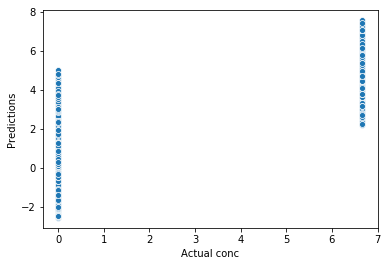

In [79]:
sns.scatterplot(x = y_test, y = pred)
plt.xlabel('Actual conc')
plt.ylabel('Predictions')
plt.show()

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, x_valid_test, y_valid_test, cv=10)
scores

array([0.73887151, 0.76433271, 0.75495597, 0.74192713, 0.76247737,
       0.73792425, 0.72961329, 0.73254026, 0.74822223, 0.74985155])